In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn version 0.19.0 required
# import sklearn
# sklearn.__version__
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split #from model_selection instead of cross_validation
from sklearn.model_selection import validation_curve #from model_selection instead of learning_curve
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [16]:
# To plot pretty figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "classification"
DATASET_ID = "_digits_"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, PROJECT_ID + DATASET_ID + fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)
    
def plot_curve(sizes, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(sizes, mu, '-', **kwargs)
    plt.fill_between(sizes, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.3)
    
def normalize_data(df, columns):
    for column in columns:
        mean_value = df.loc[:,column].mean()
        stdev = np.std(df.loc[:,column].values)
        df.loc[:,column] = (df.loc[:,column] - mean_value) / stdev
    return df

# Sklearn handwritten Digits Data

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

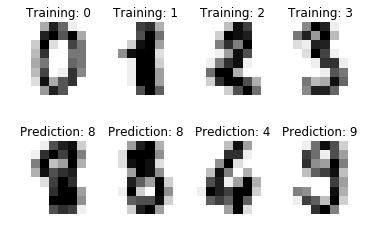

In [3]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [5]:
X = data
y = digits.target

#shuffle data
X, y = shuffle(X, y, random_state=23)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [10]:
unique, counts = np.unique(y, return_counts=True)

([<matplotlib.axis.XTick at 0x2b09bb21a90>,
 <a list of 10 Text xticklabel objects>)

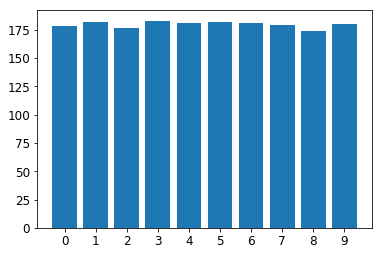

In [13]:
plt.bar(unique, counts)
plt.xticks(unique, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))

# DecisionTreeClassifier

Saving figure Decision Tree Complexity Curve


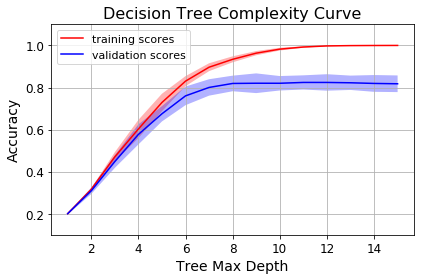

In [17]:
def plot_complexity_curve_dt():
    param_name="max_depth"
    param_range=range(1,16)
    val_train, val_test = validation_curve(DecisionTreeClassifier(random_state=0),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('Tree Max Depth'); plt.ylabel('Accuracy')
    plt.title('Decision Tree Complexity Curve', fontsize=16)
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('Decision Tree Complexity Curve', tight_layout=True)
    
plot_complexity_curve_dt()

Saving figure Decision Tree Learning Curve


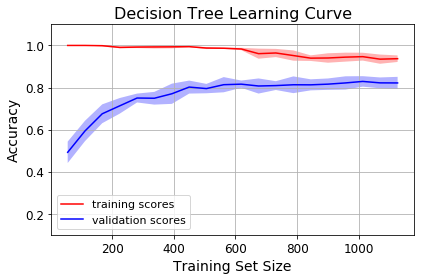

In [18]:
def plot_learning_curve_dt():
    train_sizes = np.linspace(0.05, 1, 20)
    N_train, val_train, val_test = learning_curve(DecisionTreeClassifier(max_depth=8),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('Decision Tree Learning Curve', fontsize=16)
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('Decision Tree Learning Curve', tight_layout=True)
    
plot_learning_curve_dt()

In [20]:
dt_clf = DecisionTreeClassifier(max_depth = 8, random_state=0)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.84259259259259256

# MLPClassifier

In [22]:
# first to test on one layer only

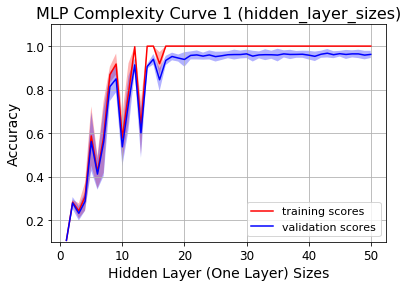

In [33]:
def plot_complexity_curve_mlp():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="hidden_layer_sizes"
    param_range=range(1,51)
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', random_state=0),
                                           X_train, y_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('Hidden Layer (One Layer) Sizes'); plt.ylabel('Accuracy')
    plt.title('MLP Complexity Curve 1 (hidden_layer_sizes)', fontsize=16)
    plt.legend(fontsize = 11)
    plt.grid()
    
plot_complexity_curve_mlp()

Saving figure MLP Complexity Curve 2 (hidden_layer numbers)


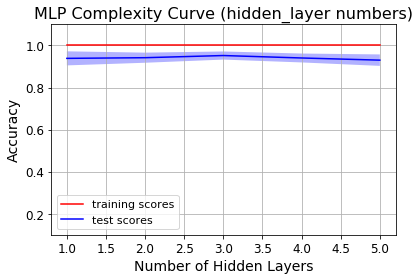

In [34]:
def plot_complexity_curve_mlp2():
    val_train_result = [np.array([])]
    val_train_std = np.array([])
    val_test_result = np.array([])
    val_test_std = np.array([])
    sizes = [(20,), (20, 20), (20, 20, 20), (20, 20, 20, 20), (20, 20, 20, 20, 20)]
    for i in sizes:
        clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes = i, random_state=0)
        results = cross_validate(clf, X_train, y_train, cv=10)

        val_train_result = np.append(val_train_result, results['train_score'].mean())
        val_test_result = np.append(val_test_result, results['test_score'].mean())
        val_train_std = np.append(val_train_std, results['train_score'].std())
        val_test_std = np.append(val_test_std, results['test_score'].std())                     
        
    lines1 = plt.plot(range(1,6),val_train_result , '-', color = 'r', label='training scores')
    lines2 = plt.plot(range(1,6),val_test_result , '-', color = 'b', label='test scores')

    plt.fill_between(range(1,6), val_train_result - val_train_std, val_train_result + val_train_std, edgecolor='none',
                     facecolor=lines1[0].get_color(), alpha=0.3)
    plt.fill_between(range(1,6), val_test_result - val_test_std, val_test_result + val_test_std, edgecolor='none',
                     facecolor=lines2[0].get_color(), alpha=0.3)
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('Number of Hidden Layers'); plt.ylabel('Accuracy')
    plt.title('MLP Complexity Curve (hidden_layer numbers)', fontsize=16)    
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('MLP Complexity Curve 2 (hidden_layer numbers)', tight_layout=True)
    
plot_complexity_curve_mlp2()

Saving figure MLP Complexity Curve 3 (max_iter)


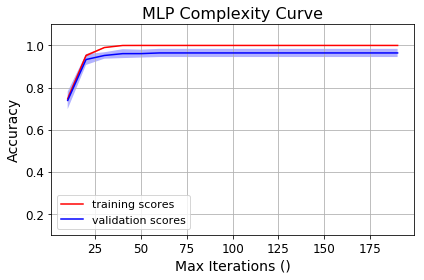

In [35]:
def plot_complexity_curve_mlp3():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="max_iter"
    param_range=range(10, 200, 10)
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', hidden_layer_sizes=30, random_state=0),
                                           X_train, y_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('Max Iterations ()'); plt.ylabel('Accuracy')
    plt.title('MLP Complexity Curve', fontsize=16)
    plt.legend(fontsize=11)
    plt.grid()
    save_fig('MLP Complexity Curve 3 (max_iter)', tight_layout=True)

plot_complexity_curve_mlp3()

Saving figure MLP Complexity Curve 4 (alpha)


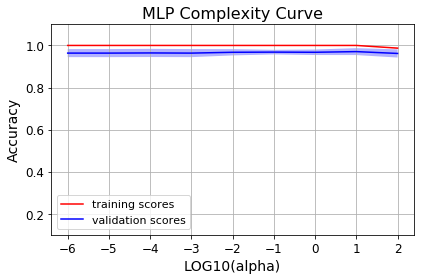

In [36]:
def plot_complexity_curve_mlp4():
    param_name="alpha"
    param_range=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 10, 100]
    val_train, val_test = validation_curve(MLPClassifier(solver='lbfgs', hidden_layer_sizes=30, max_iter = 100, random_state=0),
                                           X_train, y_train,
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('LOG10(alpha)'); plt.ylabel('Accuracy')
    plt.title('MLP Complexity Curve', fontsize=16)
    plt.legend(fontsize=11)
    plt.grid()
    save_fig('MLP Complexity Curve 4 (alpha)', tight_layout=True)
    
plot_complexity_curve_mlp4()

Saving figure MLP Learning Curve


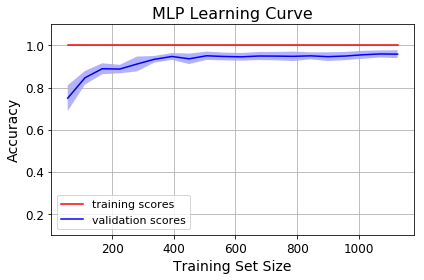

In [37]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                                                hidden_layer_sizes=30, max_iter = 100, random_state=0),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 80)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('MLP Learning Curve', fontsize=16)
    plt.legend(fontsize=11)
    plt.grid()
    save_fig('MLP Learning Curve', tight_layout=True)
    
plot_learning_curve()

In [41]:
# mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
#                         hidden_layer_sizes=(10, 2), max_iter = 200,random_state=0)
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=30, max_iter = 100,random_state=0)
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

0.96851851851851856

In [42]:
# mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
#                         hidden_layer_sizes=(10, 2), max_iter = 200,random_state=0)
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                        hidden_layer_sizes=30, max_iter = 30,random_state=0)
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

0.95925925925925926

# AdaBoostClassifier

Saving figure AdaBoost Complexity Curve (Tree Depth)


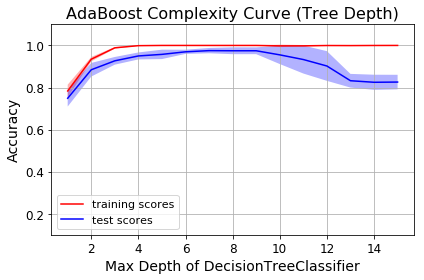

In [44]:
def plot_complexity_curve_bdt1():
    val_train_result = [np.array([])]
    val_train_std = np.array([])
    val_test_result = np.array([])
    val_test_std = np.array([])
    sizes = range(1, 16)
    for i in sizes:
        clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i),learning_rate=1,algorithm="SAMME")
        results = cross_validate(clf, X_train, y_train, cv=10)

        val_train_result = np.append(val_train_result, results['train_score'].mean())
        val_test_result = np.append(val_test_result, results['test_score'].mean())
        val_train_std = np.append(val_train_std, results['train_score'].std())
        val_test_std = np.append(val_test_std, results['test_score'].std())                     
        
    lines1 = plt.plot(sizes,val_train_result , '-', color = 'r', label='training scores')
    lines2 = plt.plot(sizes,val_test_result , '-', color = 'b', label='test scores')

    plt.fill_between(sizes, val_train_result - val_train_std, val_train_result + val_train_std, edgecolor='none',
                     facecolor=lines1[0].get_color(), alpha=0.3)
    plt.fill_between(sizes, val_test_result - val_test_std, val_test_result + val_test_std, edgecolor='none',
                     facecolor=lines2[0].get_color(), alpha=0.3)
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('Max Depth of DecisionTreeClassifier'); plt.ylabel('Accuracy')
    plt.title('AdaBoost Complexity Curve (Tree Depth)', fontsize=16)    
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('AdaBoost Complexity Curve (Tree Depth)', tight_layout=True)
    
plot_complexity_curve_bdt1()

Saving figure AdaBoost Complexity Curve (n_estimators)


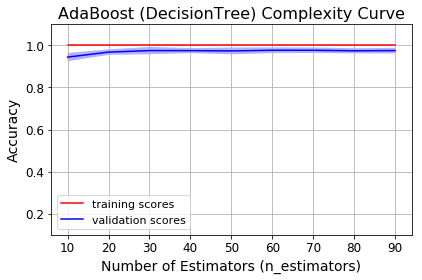

In [45]:
def plot_complexity_curve_bdt2():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="n_estimators"
    param_range=range(10, 100, 10)
    val_train, val_test = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                                           learning_rate=1,algorithm="SAMME"),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('Number of Estimators (n_estimators)'); plt.ylabel('Accuracy')
    plt.title('AdaBoost (DecisionTree) Complexity Curve', fontsize=16)    
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('AdaBoost Complexity Curve (n_estimators)', tight_layout=True)
    
plot_complexity_curve_bdt2()

Saving figure AdaBoost Learning Curve


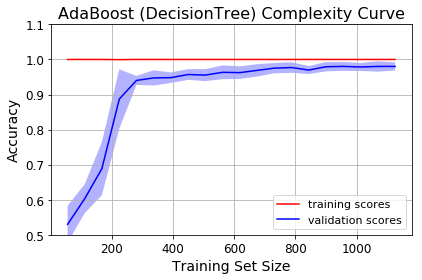

In [46]:
def plot_learning_curve_bdt():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                                                                     n_estimators=100,learning_rate=1,algorithm="SAMME"),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    plt.ylim(0.5, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('AdaBoost (DecisionTree) Complexity Curve', fontsize=16)    
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('AdaBoost Learning Curve', tight_layout=True)
    
plot_learning_curve_bdt()

In [47]:
bdt_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=8),
    n_estimators=100,
    learning_rate=1,
    algorithm="SAMME")
bdt_clf.fit(X_train, y_train)
bdt_clf.score(X_test, y_test)

0.98888888888888893

# SVC

In [ ]:
# svm_clf = SVC(kernel='linear', C=1)
# svm_clf.fit(X, y)

Saving figure SVC Complexity Curve 1 (C)


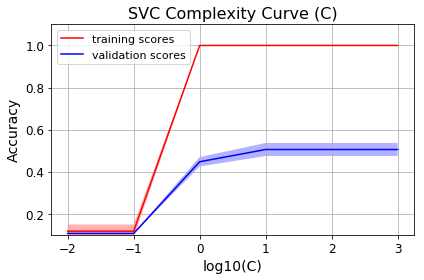

In [51]:
def plot_complexity_curve_svm1():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="C"
    param_range=[0.01, 0.1, 1, 10, 100, 1000]
    val_train, val_test = validation_curve(SVC(kernel= 'rbf'),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('log10(C)'); plt.ylabel('Accuracy')
    plt.title('SVC Complexity Curve (C)', fontsize=16)
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('SVC Complexity Curve 1 (C)', tight_layout=True)
    
plot_complexity_curve_svm1()

Saving figure SVC Complexity Curve 2 (gamma)


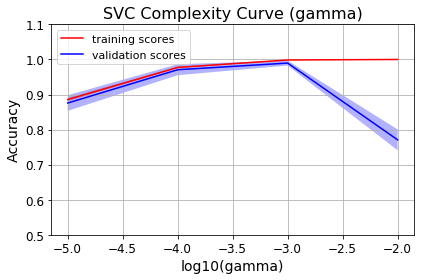

In [52]:
def plot_complexity_curve_svm2():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="gamma"
    param_range=[0.00001, 0.0001, 0.001, 0.01]
    val_train, val_test = validation_curve(SVC(kernel= 'rbf', C = 1),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(np.log10(param_range), val_train, label='training scores', color = 'r')
    plot_curve(np.log10(param_range), val_test, label='validation scores', color = 'b')
    plt.ylim(0.5, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('log10(gamma)'); plt.ylabel('Accuracy')
    plt.title('SVC Complexity Curve (gamma)', fontsize=16)
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('SVC Complexity Curve 2 (gamma)', tight_layout=True)
    
plot_complexity_curve_svm2()

Saving figure SVC Learning Curve


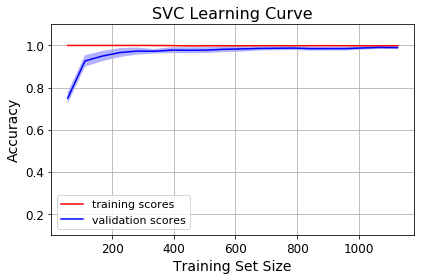

In [53]:
def plot_learning_curve_svm():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(SVC(kernel= 'rbf', C = 1, gamma = 0.001),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    plt.ylim(0.1, 1.1)
    #plt.xlim(5, 80)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('SVC Learning Curve', fontsize=16)
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('SVC Learning Curve', tight_layout=True)
    
plot_learning_curve_svm()

In [56]:
# svm_clf = SVC(kernel='linear', C=1)
svm_clf = SVC(kernel='linear', C=1)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.97037037037037033

In [55]:
# svm_clf = SVC(kernel='linear', C=1)
#svm_clf = SVC(kernel='rbf', C=100, gamma='auto')
svm_clf = SVC(kernel='rbf', C=10, gamma=1)


svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.088888888888888892

In [54]:
# svm_clf = SVC(kernel='linear', C=1)
#svm_clf = SVC(kernel='rbf', C=100, gamma='auto')
svm_clf = SVC(kernel='rbf', C=1, gamma=0.001)


svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.98888888888888893

# KNN

In [ ]:
def plot_complexity_curve_knn():
    #train_sizes = np.linspace(0.1, 0.95, 18)
    param_name="n_neighbors"
    param_range=range(1, 20)
    val_train, val_test = validation_curve(KNeighborsClassifier(),
                                           X_train, y_train, 
                                           param_name=param_name, param_range=param_range, cv=10)
    #print (val_train)
    plot_curve(param_range, val_train, label='training scores', color = 'r')
    plot_curve(param_range, val_test, label='validation scores', color = 'b')
    plt.ylim(0.9, 1.1)
    #plt.xlim(5, 800)
    plt.xlabel('Number of Neighbors (n_neighbors)'); plt.ylabel('Accuracy')
    plt.title('KNN Complexity Curve', fontsize=16)
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('KNN Complexity Curve (n_neighbors)', tight_layout=True)
    
plot_complexity_curve_knn()

In [ ]:
def plot_learning_curve_knn():
    train_sizes = np.linspace(0.05, 1, 20) # if the train size is too small, training sample may only contain one class
    N_train, val_train, val_test = learning_curve(KNeighborsClassifier(n_neighbors=1),
                                                  X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_curve(N_train, val_train, label='training scores', color = 'r')
    plot_curve(N_train, val_test, label='validation scores', color = 'b')
    plt.ylim(0.5, 1.1)
    #plt.xlim(5, 80)
    plt.xlabel('Training Set Size'); plt.ylabel('Accuracy')
    plt.title('KNN Learning Curve', fontsize=16)
    plt.legend(fontsize = 11)
    plt.grid()
    save_fig('KNN Learning Curve', tight_layout=True)
    
plot_learning_curve_knn()

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)